In [1]:
import pandas as pd

In [2]:
df= pd.read_excel(r"C:\Users\Administrator\LIS/MISAutomation/CategoryTrackingExportReport_01-07-2025_June25data.xlsx")
## http://45.118.163.57:8888/files/LIS/MISAutomation/CategoryTrackingSOS_Jun%2025.ipynb?_xsrf=2%7C4c9539a6%7C59e8480eda0e7e54c98538d00480dcd1%7C1750236356

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108256 entries, 0 to 166259
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   108256 non-null  datetime64[ns]
 1   LIS Store Code         108256 non-null  object        
 2   Category TrackingName  108256 non-null  object        
 3   ProductFacings         108256 non-null  int64         
 4   Total Facings          108256 non-null  int64         
 5   AverageSOSPerce        108180 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.8+ MB


In [31]:
df2 = pd.read_csv(r'C:\Users\Administrator\LIS\MISAutomation\CategroyTrackingDatajune.csv')

In [28]:
df2= df[['VisitId','Submitted Date&Time',
         'LIS Store Code',
         'Chain Name',
         'Format',
         'Region',
         'City',
         'Category TrackingName',
         'Category ProductName',
         'Facings',
         'Total Facings'
        ]]

KeyError: "['VisitId', 'Submitted Date&Time', 'Chain Name', 'Format', 'Region', 'City', 'Category ProductName', 'Facings'] not in index"

In [34]:
df2 = df2.drop(['Unnamed: 0'],axis=1)
df2.head()

VisitId  Submitted Date&Time LIS Store Code Chain Name Format Region  \
0   468677  29-06-2025 06:30:33     JNJ-100329     D Mart  Hyper  North   
1   468677  29-06-2025 06:30:33     JNJ-100329     D Mart  Hyper  North   
2   468677  29-06-2025 06:30:33     JNJ-100329     D Mart  Hyper  North   
3   468677  29-06-2025 06:30:33     JNJ-100329     D Mart  Hyper  North   
4   468677  29-06-2025 06:30:33     JNJ-100329     D Mart  Hyper  North   

     City Category TrackingName       Category ProductName  Facings  \
0  Jaipur             Baby Care           BabyCare Classic        0   
1  Jaipur             Baby Care           BabyCare Premium       16   
2  Jaipur           Beauty Care            Clean and Clear       18   
3  Jaipur           Beauty Care  FaceWash category image 2        0   
4  Jaipur           Beauty Care  FaceWash category image 3        0   

   Total Facings  
0             40  
1             40  
2             86  
3             86  
4             86

In [7]:
df2.to_csv(r'C:\Users\Administrator\LIS\MISAutomation\CategroyTrackingDatajune.csv')

In [35]:
df2['Date'] = pd.to_datetime(df2['Submitted Date&Time'], dayfirst=True).dt.date

In [36]:
df2 = df2.drop('Submitted Date&Time', axis=1)

In [37]:
df2.head()

VisitId LIS Store Code Chain Name Format Region    City  \
0   468677     JNJ-100329     D Mart  Hyper  North  Jaipur   
1   468677     JNJ-100329     D Mart  Hyper  North  Jaipur   
2   468677     JNJ-100329     D Mart  Hyper  North  Jaipur   
3   468677     JNJ-100329     D Mart  Hyper  North  Jaipur   
4   468677     JNJ-100329     D Mart  Hyper  North  Jaipur   

  Category TrackingName       Category ProductName  Facings  Total Facings  \
0             Baby Care           BabyCare Classic        0             40   
1             Baby Care           BabyCare Premium       16             40   
2           Beauty Care            Clean and Clear       18             86   
3           Beauty Care  FaceWash category image 2        0             86   
4           Beauty Care  FaceWash category image 3        0             86   

         Date  
0  2025-06-29  
1  2025-06-29  
2  2025-06-29  
3  2025-06-29  
4  2025-06-29

In [39]:
grouped_df = df2.groupby([
    'VisitId', 'Date','LIS Store Code', 'Chain Name', 'Format',
    'Region', 'City', 'Category TrackingName'
], as_index=False).agg({
    'Facings': 'sum',
    'Total Facings': 'mean'
})


In [40]:
grouped_df.to_csv(r'C:\Users\Administrator\LIS\MISAutomation\CategroyTrackingDatajune_groupeddf.csv')

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel
df = pd.read_excel(r"C:\Users\Administrator\LIS/MISAutomation\SOSPerceOutputv1 Jun25.xlsx")

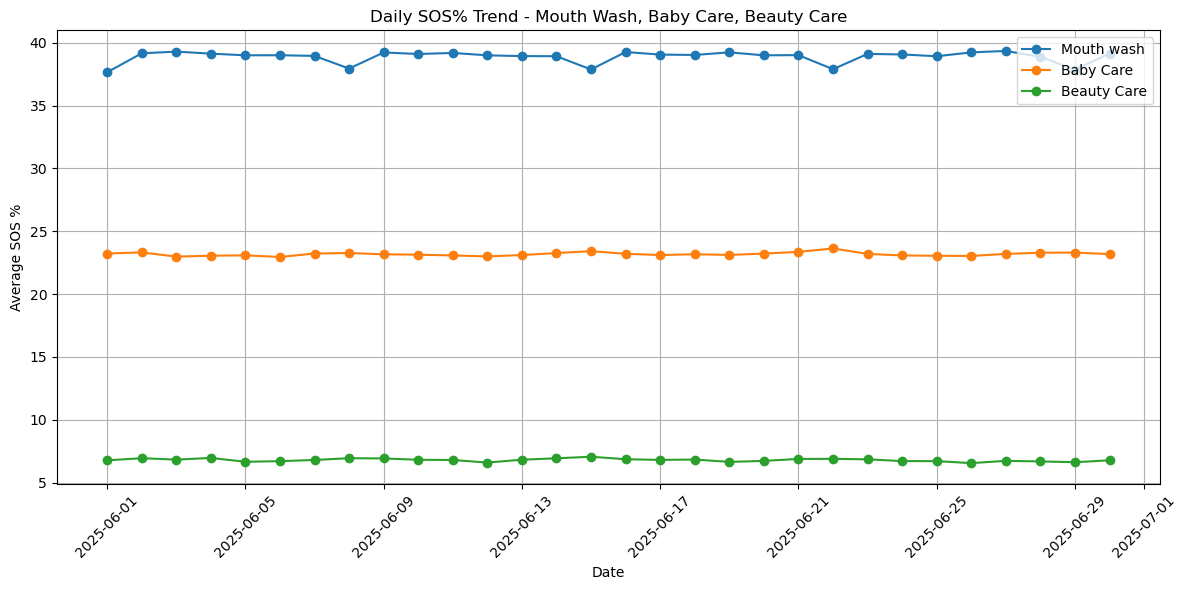

In [26]:
# Clean columns
df.columns = df.columns.str.strip().str.replace("'", "").str.replace('"', '')

# Convert types
df['Date'] = pd.to_datetime(df['Date'])
df['AverageSOSPerce'] = pd.to_numeric(df['AverageSOSPerce'], errors='coerce')

# Filter categories
categories = ['Mouth wash', 'Baby Care', 'Beauty Care']
df = df[df['Category TrackingName'].isin(categories)]

# Group and pivot
trend = df.groupby(['Date', 'Category TrackingName'])['AverageSOSPerce'].mean().reset_index()
trend['AverageSOSPerce'] *= 100
pivot = trend.pivot(index='Date', columns='Category TrackingName', values='AverageSOSPerce')

# Plot
plt.figure(figsize=(12, 6))
for cat in categories:
    plt.plot(pivot.index, pivot[cat], marker='o', label=cat)

plt.title("Daily SOS% Trend - Mouth Wash, Baby Care, Beauty Care")
plt.xlabel("Date")
plt.ylabel("Average SOS %")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
